In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "cmr"
matplotlib.rcParams["font.size"] = "11"

In [2]:
def plot_family(df, suptitle):
    fig, axes = plt.subplots(2, 3, figsize=(12,6), layout="constrained")
    glmnet_col = df["glmnet"]
    df = df.drop(columns=["glmnet"])
    df["glmnet"] = glmnet_col
    ns = df["n"].unique()
    rhos = df["rho"].unique()
    pkgs = df.columns[3:]
    linestyles = ['-', ':', '--', '-.', '-']
    for i, n in enumerate(ns):
        for j, rho in enumerate(rhos):
            _df = df[(df["n"] == n) & (df["rho"] == rho)]
            for k, pkg in enumerate(pkgs):
                if np.any(np.isnan(_df[pkg])): continue
                axes[i,j].plot(
                    _df["G"], 
                    _df[pkg], 
                    linestyle=linestyles[k],
                    marker='.',
                    label=pkg if 3 * i + j == 5 else None, # only one legend 
                )
                axes[i,j].set_title(f"$n = {n} \, \\vert \, \\rho = {rho}$")
                if i == 1:
                    axes[i,j].set_xlabel("G")
                if j == 0:
                    axes[i,j].set_ylabel("Time (s)")
                axes[i,j].set_yscale("log")
                axes[i,j].set_xscale("log")
    fig.legend(loc='outside center right')
    fig.suptitle(suptitle)
    return fig, axes


In [36]:
gaussian_time = pd.read_csv("../data/group_lasso_sim_gaussian_time.csv", sep=" ")
gaussian_objective = pd.read_csv("../data/group_lasso_sim_gaussian_objective.csv", sep=" ")
binomial_time = pd.read_csv("../data/group_lasso_sim_binomial_time.csv", sep=" ")
binomial_objective = pd.read_csv("../data/group_lasso_sim_binomial_objective.csv", sep=" ")

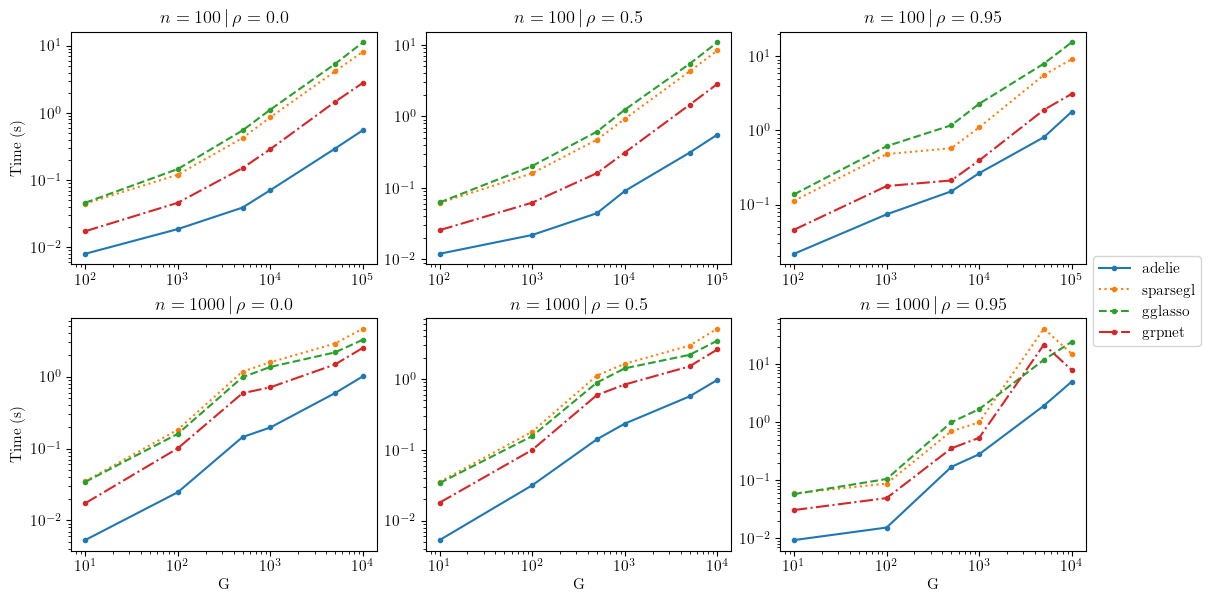

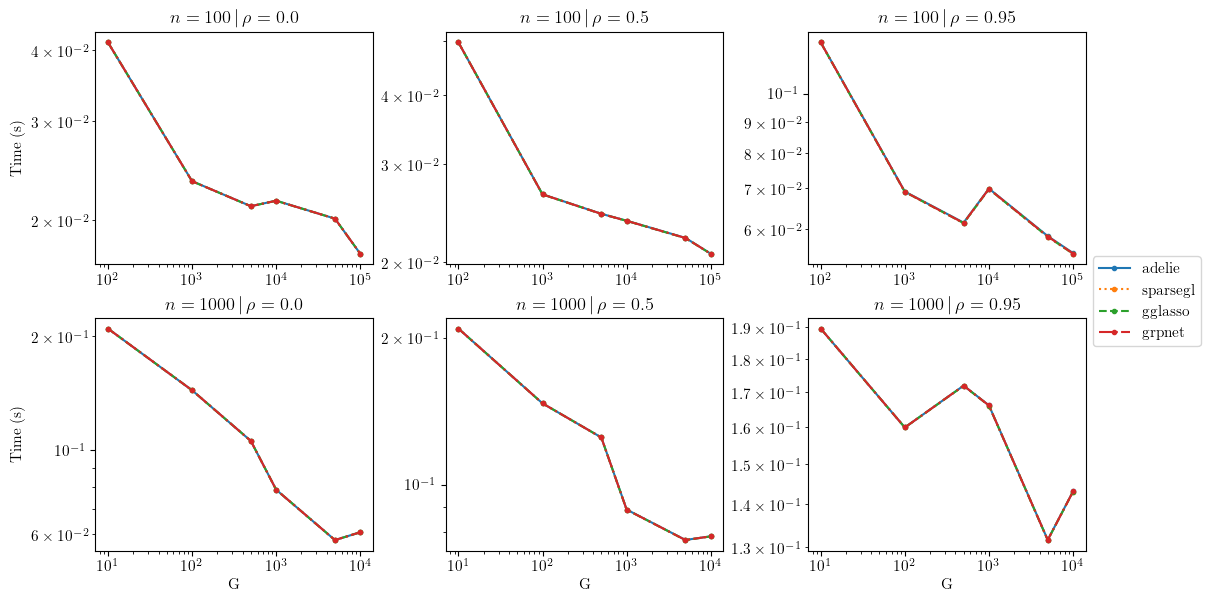

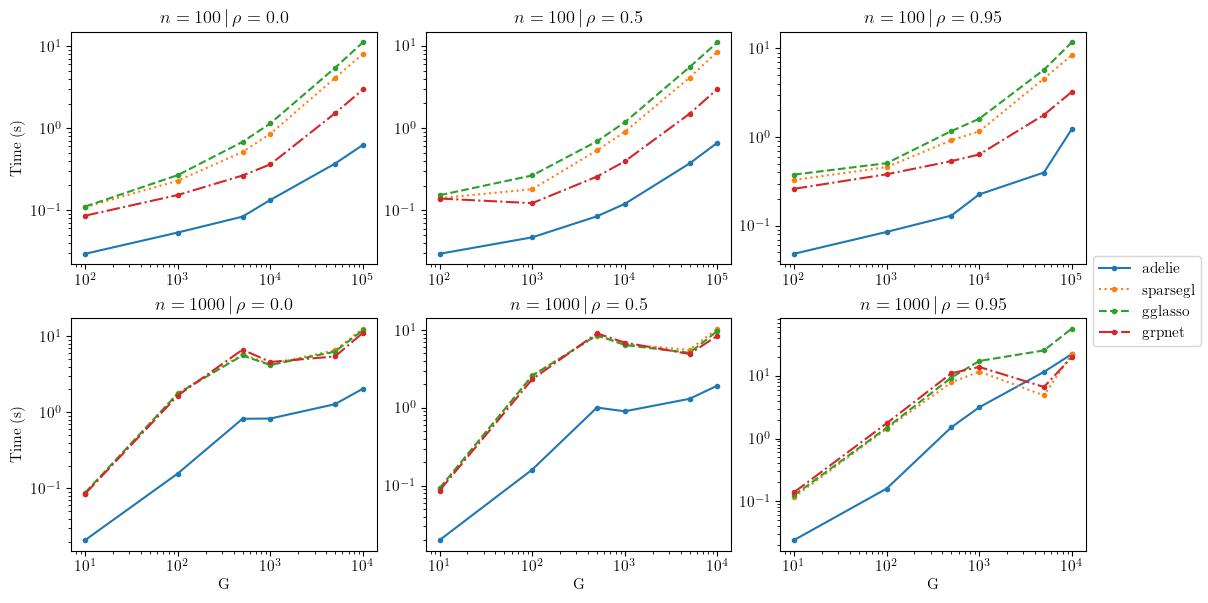

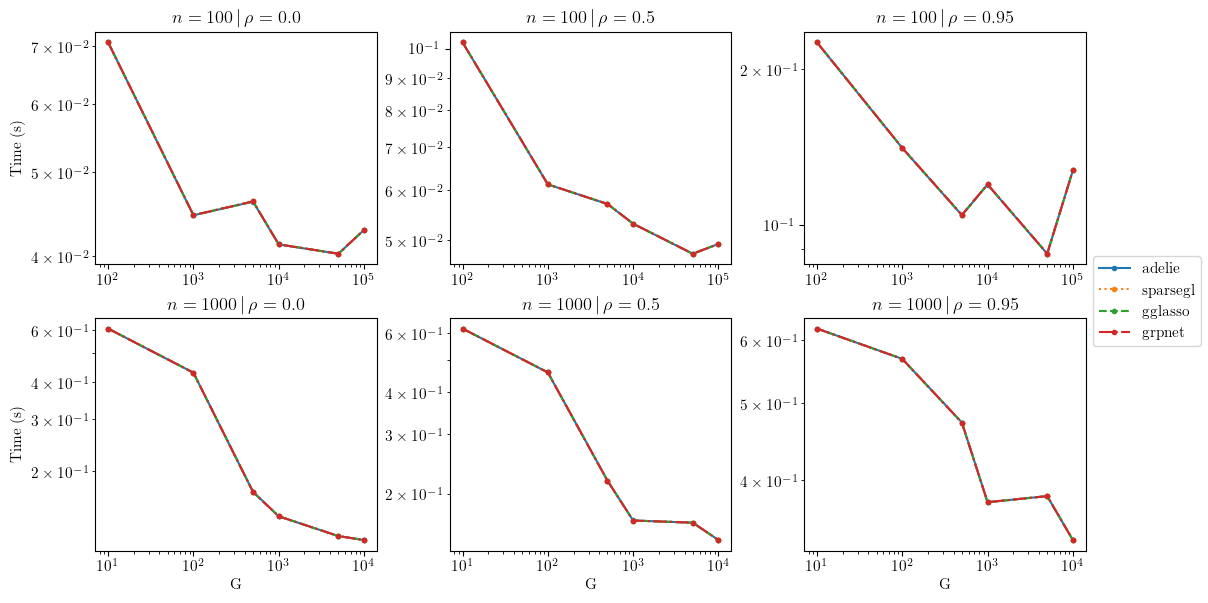

In [37]:
dfs = [gaussian_time, gaussian_objective, binomial_time, binomial_objective]
names = [
    "group_lasso_sim_gaussian_time", 
    "group_lasso_sim_gaussian_objective", 
    "group_lasso_sim_binomial_time", 
    "group_lasso_sim_binomial_objective"
]

for df, name in zip(dfs, names):
    suptitle = None#"Gaussian Family" if "gaussian" in name else "Binomial"
    fig, axes = plot_family(df, suptitle)
    fig.savefig(f"../figures/{name}.pdf", bbox_inches="tight")
    plt.show()

## Real Data Analysis

In [3]:
df = pd.read_csv("../data/group_lasso_real.csv", sep=" ")
df

name      n     G      p  adelie.user.self  sparsegl.user.self  \
0      prostate    102  6033  18099          0.092333            0.639000   
1  ujiindoorloc  19937   465   1395          2.673333           15.086333   
2      leukemia     72  7129  21387          0.067000            0.488000   

   gglasso.user.self  grpnet.user.self  
0           0.869000          0.298667  
1          14.431333       5281.206667  
2           0.808000          0.183000

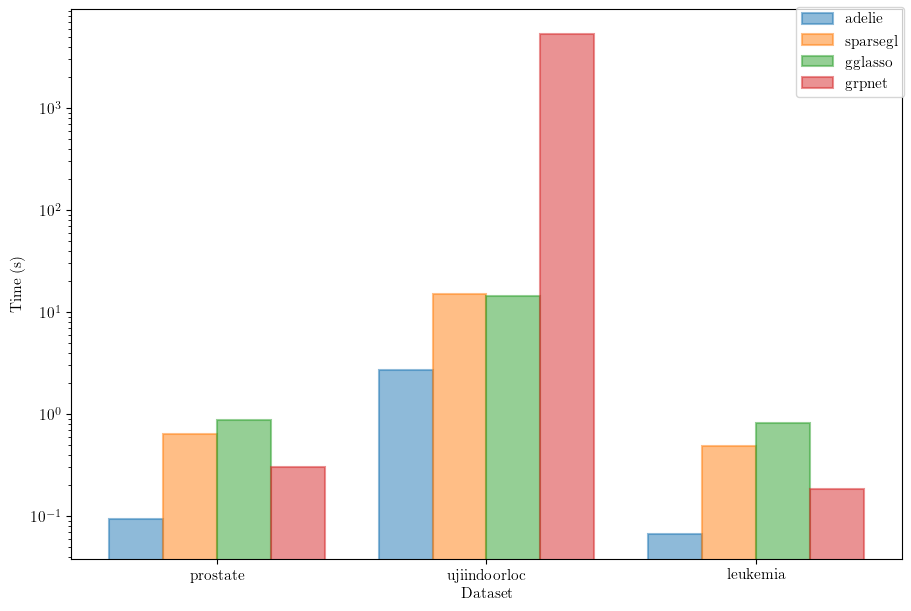

In [4]:
index = np.arange(df.shape[0])
bar_width = 0.2
df_indices = np.arange(-4, 0)
names = ["adelie", "sparsegl", "gglasso", "grpnet"]
datasets = df["name"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
fig, ax = plt.subplots(1, 1, figsize=(9,6), layout="constrained")
for i, (k, name) in enumerate(zip(df_indices, names)):
    ax.bar(
        index + i * bar_width, 
        df.iloc[:,k], 
        bar_width,
        label=name, 
        color=colors[i],
        edgecolor=colors[i],
        linewidth=1.5,
        alpha=0.5,
    )
ax.set_xlabel("Dataset")
ax.set_ylabel("Time (s)")
ax.set_yscale("log")
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(datasets)
fig.legend()
fig.savefig("../figures/group_lasso_real.png", dpi=300, bbox_inches="tight")
plt.show()

## Benchmark Lasso

In [40]:
gaussian_time = pd.read_csv("../data/lasso_sim_gaussian_time.csv", sep=" ")
gaussian_objective = pd.read_csv("../data/lasso_sim_gaussian_objective.csv", sep=" ")
binomial_time = pd.read_csv("../data/lasso_sim_binomial_time.csv", sep=" ")
binomial_objective = pd.read_csv("../data/lasso_sim_binomial_objective.csv", sep=" ")

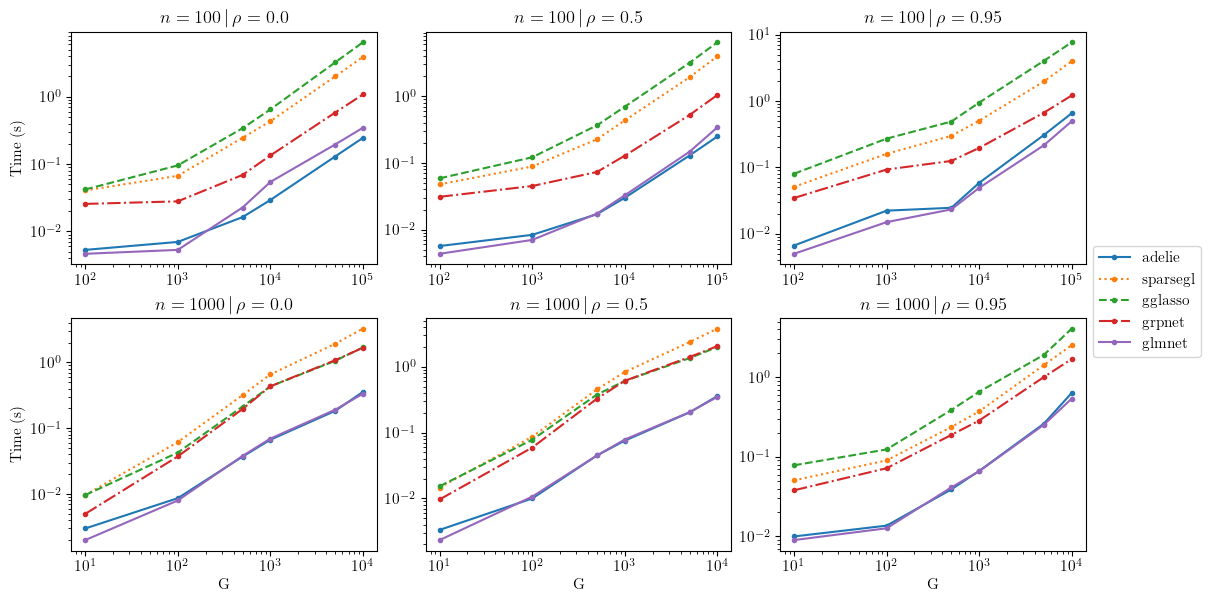

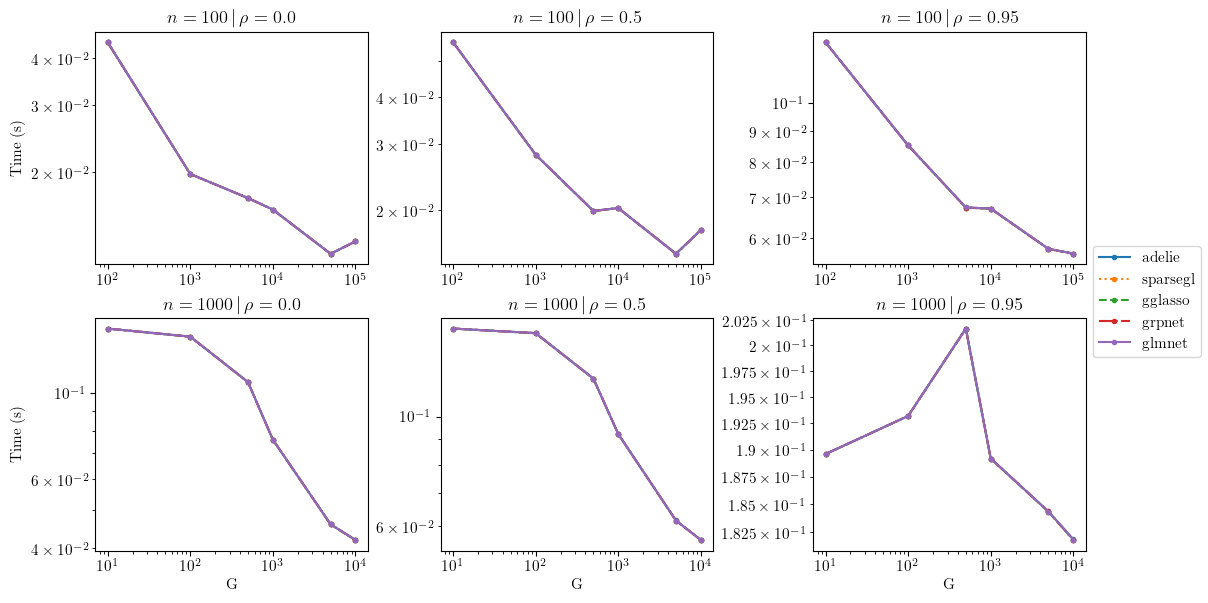

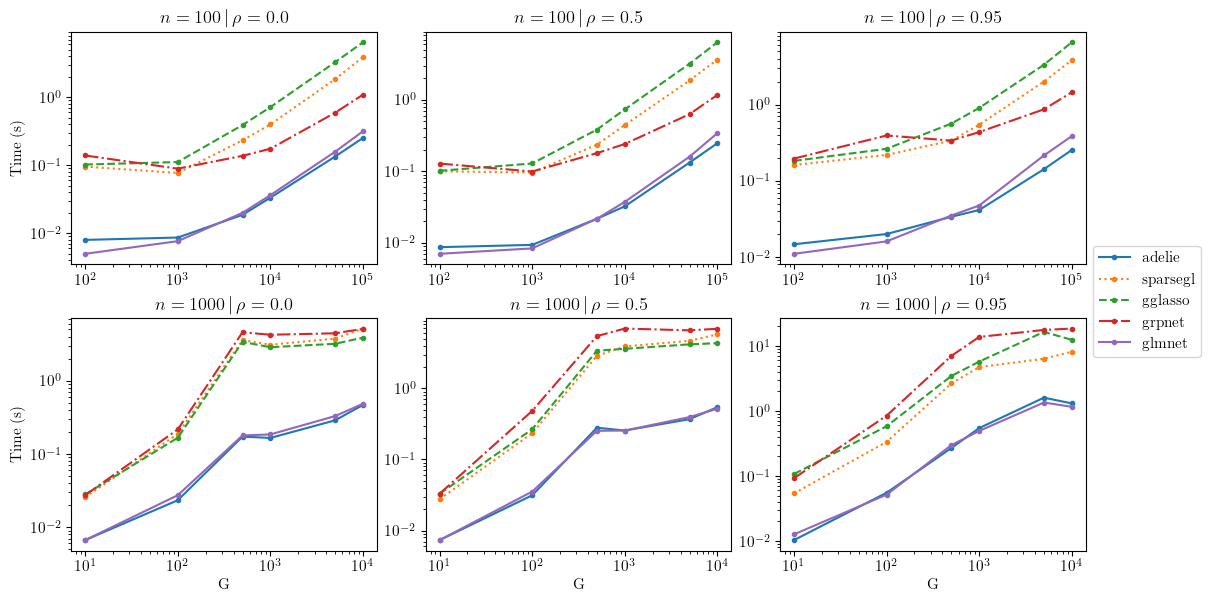

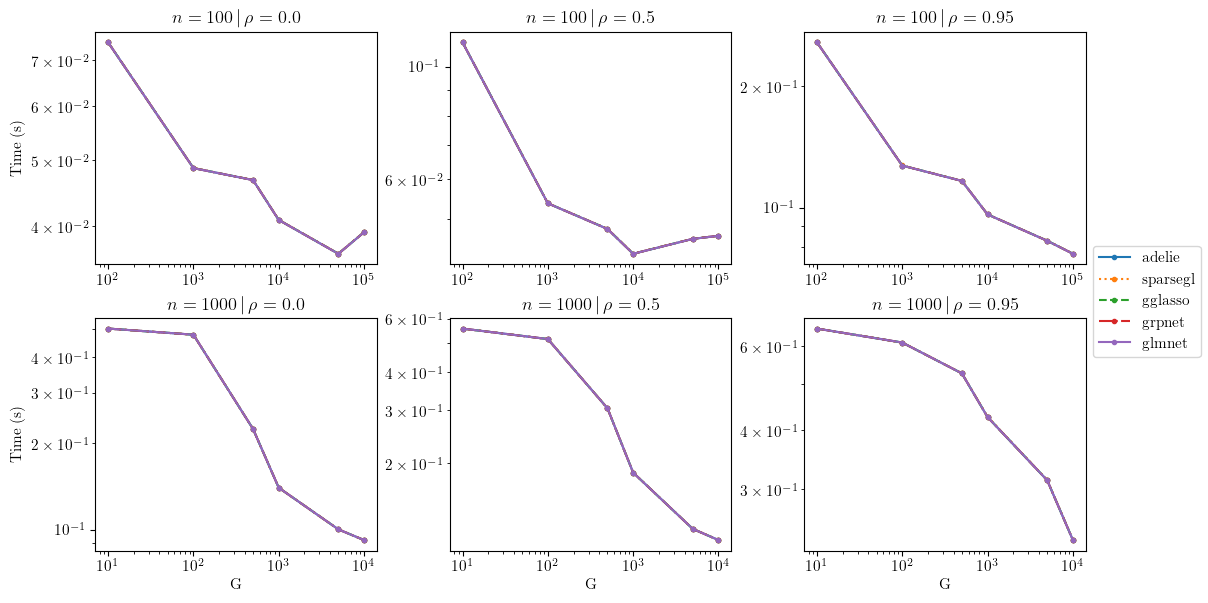

In [41]:
dfs = [
    gaussian_time, 
    gaussian_objective, 
    binomial_time, 
    binomial_objective,
]
names = [
    "lasso_sim_gaussian_time", 
    "lasso_sim_gaussian_objective", 
    "lasso_sim_binomial_time", 
    "lasso_sim_binomial_objective"
]

for df, name in zip(dfs, names):
    suptitle = None#"Gaussian Family" if "gaussian" in name else "Binomial"
    fig, axes = plot_family(df, suptitle)
    fig.savefig(f"../figures/{name}.pdf", bbox_inches="tight")
    plt.show()

## Real Data Analysis (Lasso)

In [5]:
df = pd.read_csv("../data/lasso_real.csv", sep=" ")
df = df.rename(columns={
    "adelie.user.self":"adelie",
    "glmnet.user.self":"glmnet",
    "sparsegl.user.self":"sparsegl",
    "gglasso.user.self":"gglasso",
    "grpnet.user.self":"grpnet",
})
glmnet_col = df["glmnet"]
df = df.drop(columns=["glmnet"])
df["glmnet"] = glmnet_col

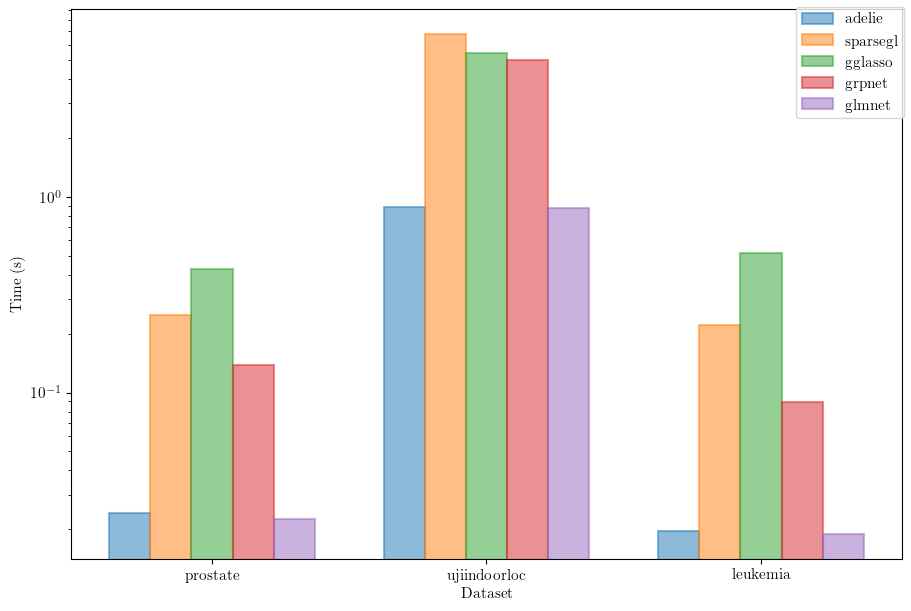

In [6]:
index = np.arange(df.shape[0])
bar_width = 0.15
df_indices = np.arange(-5, 0)
names = ["adelie", "sparsegl", "gglasso", "grpnet", "glmnet"]
datasets = df["name"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
fig, ax = plt.subplots(1, 1, figsize=(9,6), layout="constrained")
for i, (k, name) in enumerate(zip(df_indices, names)):
    ax.bar(
        index + i * bar_width, 
        df.iloc[:,k], 
        bar_width,
        label=name, 
        color=colors[i],
        edgecolor=colors[i],
        linewidth=1.5,
        alpha=0.5,
    )
ax.set_xlabel("Dataset")
ax.set_ylabel("Time (s)")
ax.set_yscale("log")
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(datasets)
fig.legend()
fig.savefig("../figures/lasso_real.png", dpi=300, bbox_inches="tight")
plt.show()